In [2]:
%matplotlib inline

from metadata import metadata
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd

In [3]:
GCI = None

In [4]:
pd.set_option('display.width', None)
style.use('ggplot')
plt.rcParams['figure.figsize'] = (50, 10)
plt.rcParams['font.family'] = 'sans-serif'

In [5]:
def set_codes(arr):
    if pd.isnull(arr):
        return ['-'] * 6
    else:
        codes = arr.split('.')
        while len(codes) < 6:
            codes.append('-')
        return tuple(codes)

In [6]:
def plot_indicator(id, edition):
    global GCI
    gci = get_gci() if GCI is None else GCI
    indicator = gci[id].xs(edition, level='Edition').dropna()
    column_name = metadata.loc[metadata['id'] == id, 'Series unindented'].iloc[0]
    data = pd.DataFrame(indicator.values, columns=[column_name], index=indicator.index)
    data.plot(kind='bar')
    plt.show()

In [7]:
raw_data = pd.read_csv('../../data/GCI_Dataset_2006-2015.data.csv')

In [8]:
raw_data_2 = raw_data[raw_data.Attribute.isin(['Value'])].drop(
    ['Series', 'Series unindented', 'Placement', 'Dataset', 'Attribute', 'AVG', 'LAC', 'DEVASIA',
     'MENAP', 'SSA', 'CIS', 'CEE', 'ADV', 'LIC', 'LMIC', 'UMIC', 'HICO', 'HICNO', 'ASEAN', 'STAGE1',
     'TRANS1TO2', 'STAGE2', 'TRANS2TO3', 'STAGE3'], axis=1).sort_values(['Edition', 'GLOBAL ID'])

In [9]:
raw_data_2.drop('Series code', axis=1, inplace=True)
raw_data_2 = raw_data_2.merge(metadata[['GLOBAL ID', 'Series type', 'parents', 'id']], on='GLOBAL ID')

In [10]:
raw_data_2 = raw_data_2[raw_data_2['Series type'] == 'Indicator']

In [11]:
raw_data_2['code_1'], raw_data_2['code_2'], raw_data_2['code_3'], raw_data_2['code_4'], \
raw_data_2['code_5'], raw_data_2['code_6'] = zip(*raw_data_2['id'].map(set_codes))

In [12]:
raw_data_3 = pd.melt(raw_data_2.drop(['Series type', 'parents'], axis=1),
                     id_vars=['Edition', 'id', 'GLOBAL ID', 'code_1', 'code_2', 'code_3', 'code_4',
                              'code_5', 'code_6'],
                     var_name='entity')

In [13]:
raw_data_3['value'] = pd.to_numeric(raw_data_3['value'], errors='coerce')

In [14]:
gci = raw_data_3.pivot_table('value', ['entity', 'Edition'],
                             ['id', 'GLOBAL ID', 'code_1', 'code_2', 'code_3', 'code_4', 'code_5', 'code_6'])

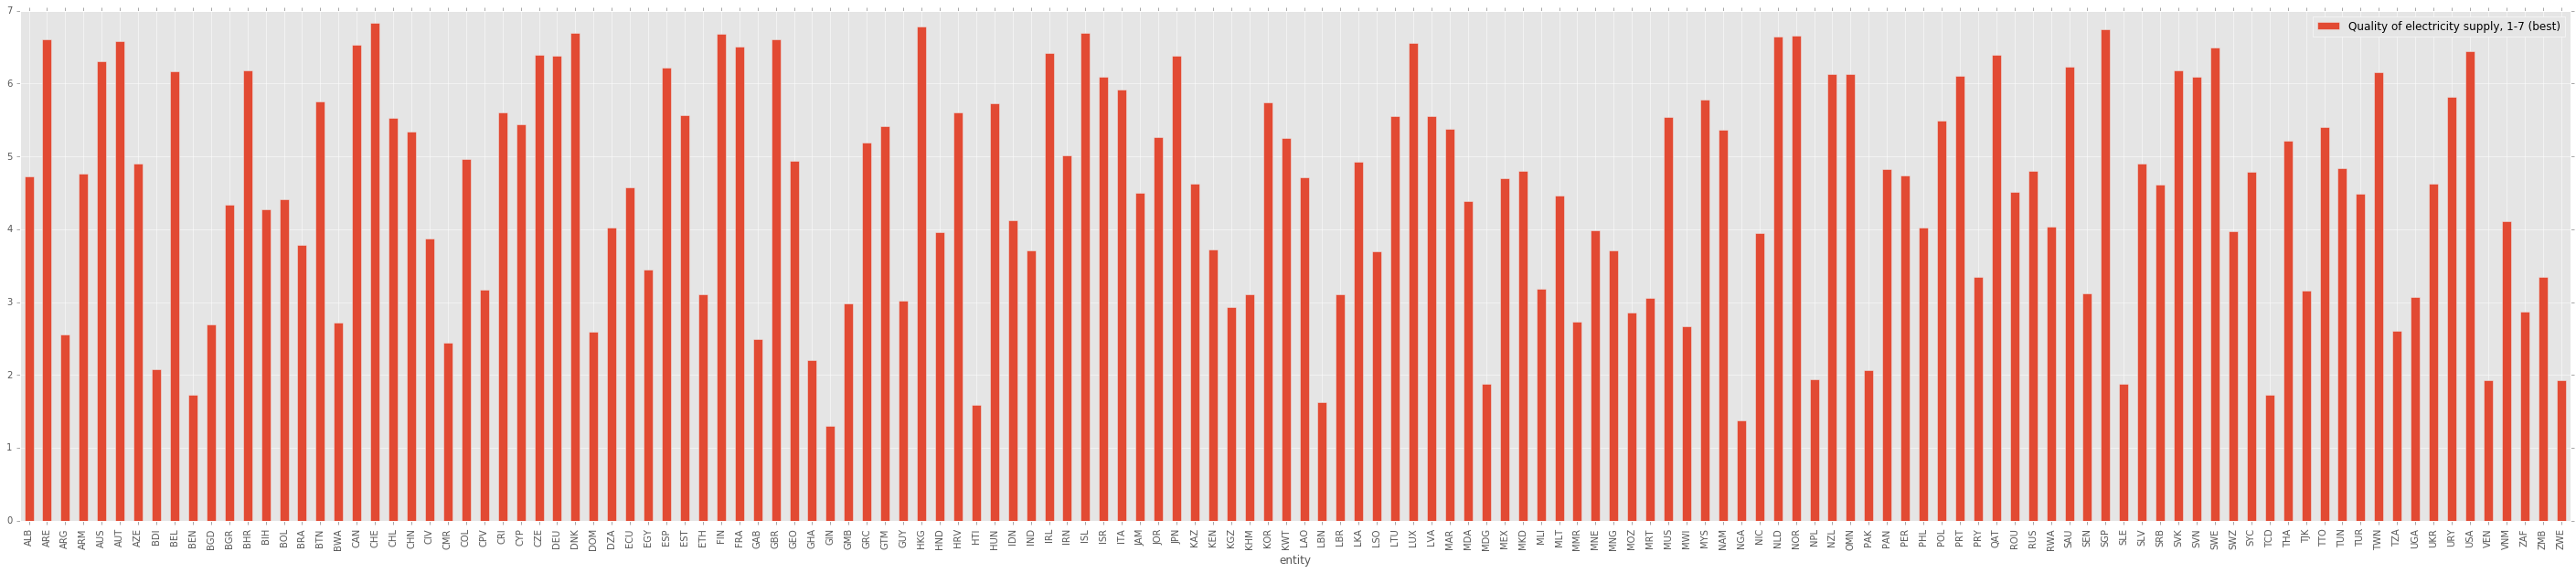

In [15]:
id = 'GCI.A.02.02.01'
edition = '2015-2016'
indicator = gci[id].xs(edition, level='Edition').dropna()
column_name = metadata.loc[metadata['id'] == id, 'Series unindented'].iloc[0]
data = pd.DataFrame(indicator.values, columns=[column_name], index=indicator.index)
data.plot(kind='bar')
plt.show()

In [ ]:
gci.xs('AIRSEATKM', level='GLOBAL ID', axis=1)

In [ ]:
idx = pd.IndexSlice
gci.loc[slice('AGO'),slice('DZA')]

In [ ]:
gci['GCI.A.01.01.01.01']